# Neural Network ANN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [3]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [4]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,-0.005025,0.030928,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,-0.029925,0.047619,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0.002387,0.034063,0,1,0,0.012107
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0.011820,0.028986,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0.026190,0.044444,0,0,1,-0.021531


In [1]:
import neurolab as nl

In [48]:
X = np.array(dataset['Increase_Decrease'])
Y = np.array(dataset['Buy_Sell'])

In [50]:
size = len(X)
inp = X.reshape(size,1)
tar = Y.reshape(size,1)

In [51]:
inp_min = np.min(inp)
inp_max = np.max(inp)
print (inp_min,inp_max)

0 1


In [52]:
net = nl.net.newff([[inp_min, inp_max]],[5, 1],[nl.trans.PureLin(), nl.trans.PureLin()])
net.trainf = nl.train.train_rprop

In [53]:
error = net.train(inp, tar, epochs=1000, show=100, goal=0.00002)

Epoch: 100; Error: 156.53503139196584;
Epoch: 200; Error: 156.53503139196584;
Epoch: 300; Error: 156.53503139196584;
Epoch: 400; Error: 156.53503139196584;
Epoch: 500; Error: 156.53503139196584;
Epoch: 600; Error: 156.53503139196584;
Epoch: 700; Error: 156.53503139196584;
Epoch: 800; Error: 156.53503139196584;
Epoch: 900; Error: 156.53503139196584;
Epoch: 1000; Error: 156.53503139196584;
The maximum number of train epochs is reached


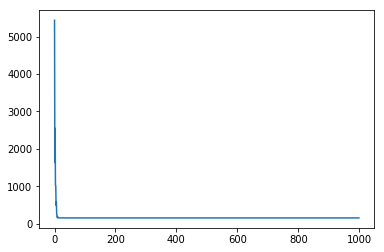

In [54]:
fig=plt.figure()
plt.plot(error)
plt.show()

In [55]:
out = net.sim(inp)

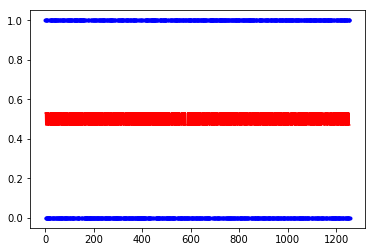

In [56]:
fig=plt.figure()
plt.plot(tar,'b.')
plt.plot(out,'r-')
plt.show()

In [62]:
print('Prediction result: ', net.sim([inp[0]]))

Prediction result:  [[ 0.53146853]]
